<a href="https://colab.research.google.com/github/lashaa06/textile-sale-forecasting/blob/main/sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEXTILE SALE FORECASTING USING SARIMA
### 📈 A Time Series Forecasting Project on Simulated Garment Sales Data (1964–1975)
---

**Author**: Magheilashaa Selvakumar  
**Branch**: B.Tech Artificial Intelligence and Data Science  
**Project Type**: Academic / Internship Project  
**Tools Used**: Python, pandas, matplotlib, statsmodels (SARIMA)  
**Status**: Completed  
**Forecast Range**: Jan 1973 – Dec 1975

---

### Objective:
To build a seasonal time-series model that forecasts monthly garment sales based on realistic historical trends in the textile industry.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#  About the Dataset
This project uses a simulated monthly sales dataset of garments ranging from January 1964 to December 1972. The dataset was artificially generated using Python to reflect realistic sales behavior in the textile industry, including:



*   Seasonal demand spikes (e.g., November–December)

*   Gradual upward sales trends

*   Random fluctuations to simulate real-world uncertainty


Due to data confidentiality constraints during my internship, real industry data could not be used. To enable model development and skill application, this synthetic dataset was created with the help of ChatGPT, designed to mirror authentic sales dynamics in the garment sector.

In [4]:
df=pd.read_csv('/content/garment_monthly_sales_1964_1972.csv')

### Exploratory Data Analysis

In [5]:
df.head()

,Date,Sales
0,1964-01-01,637
1,1964-02-01,415
2,1964-03-01,605
3,1964-04-01,504
4,1964-05-01,526


In [6]:
df.tail()

,Date,Sales
103,1972-08-01,522
104,1972-09-01,645
105,1972-10-01,642
106,1972-11-01,771
107,1972-12-01,804


In [7]:
df.describe()

,Sales
count,108.000000
mean,590.000000
std,96.097983
min,415.000000
25%,512.250000
50%,585.500000
75%,640.500000
max,851.000000


In [8]:
df.isnull().sum()

,0
Date,0
Sales,0


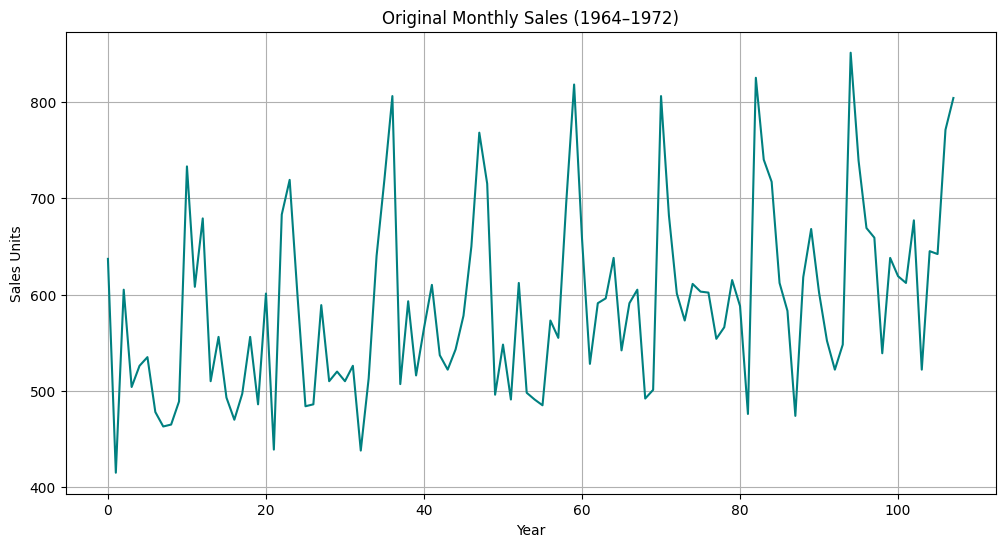

In [9]:
# Plot monthly sales trend over time
plt.figure(figsize=(12,6))
df['Sales'].plot(title='Original Monthly Sales (1964–1972)', color='teal')
plt.ylabel('Sales Units')
plt.xlabel('Year')
plt.grid(True)
plt.show()


In [10]:
df.columns=["Month","Sales"]

In [11]:
df.head()

,Month,Sales
0,1964-01-01,637
1,1964-02-01,415
2,1964-03-01,605
3,1964-04-01,504
4,1964-05-01,526


In [12]:
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.tail()

,Month,Sales
103,1972-08-01,522
104,1972-09-01,645
105,1972-10-01,642
106,1972-11-01,771
107,1972-12-01,804


In [14]:
df.set_index('Month',inplace=True)

In [15]:
df.head()

,Sales
Month,
1964-01-01,637
1964-02-01,415
1964-03-01,605
1964-04-01,504
1964-05-01,526


VISUALIZING DATA

<Axes: xlabel='Month'>

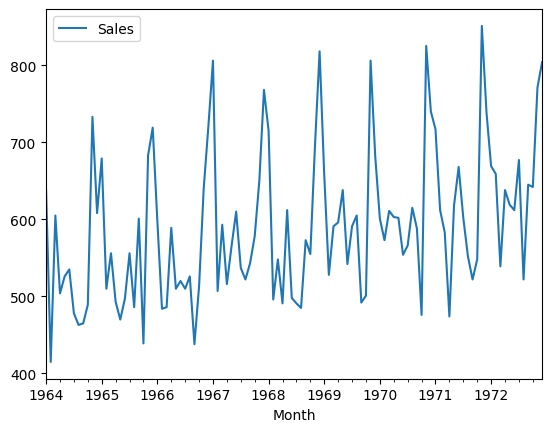

In [16]:
df.plot()

THIS PLOT IS SEASONAL AS IT VALUES CONSTANTLY CHANGES OVER TIME AND HENCE NOT STATIONARY


Time Series requires stationary data

In [17]:
###Testing for statinary
from statsmodels.tsa.stattools import adfuller


In [18]:
test_result=adfuller(df['Sales'])

In [19]:
#HO It is not Stationary
#H1: It is Stationary

def adfuller_test(sales):
  result=adfuller(sales)
  labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1]<=0.5:
    print("strong evidence against null hypothesis(H0), reject the null hypotheses. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")


In [20]:
adfuller_test(df['Sales'])

ADF Test Statistic : -0.5964628216005278
p-value : 0.8717792827822111
#Lags Used : 11
Number of Observations Used : 96
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


**DIFFERENCING**

TO MAKE THE DATA STATIONARY WE ARE DOING DIFFERENCING ( sifting position of sales data)

In [21]:
df['Sales'].shift(1)

,Sales
Month,
1964-01-01,NaN
1964-02-01,637.0
1964-03-01,415.0
1964-04-01,605.0
1964-05-01,504.0
...,...
1972-08-01,677.0
1972-09-01,522.0
1972-10-01,645.0


In [22]:
df['Sales First Differnece']=df['Sales']-df['Sales'].shift(1)

Data is seasonal on one cycle of 112 monthss so we apply seasonal  difference

In [23]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [24]:
df.head(14)

,Sales,Sales First Differnece,Seasonal First Difference
Month,,,
1964-01-01,637,NaN,NaN
1964-02-01,415,-222.0,NaN
1964-03-01,605,190.0,NaN
1964-04-01,504,-101.0,NaN
1964-05-01,526,22.0,NaN
1964-06-01,535,9.0,NaN
1964-07-01,478,-57.0,NaN
1964-08-01,463,-15.0,NaN
1964-09-01,465,2.0,NaN


In [25]:
## Again test with dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.182570407271185
p-value : 9.54177607729692e-06
#Lags Used : 12
Number of Observations Used : 83
strong evidence against null hypothesis(H0), reject the null hypotheses. Data has no unit root and is stationary


dropna() to not consider NaN values

<Axes: xlabel='Month'>

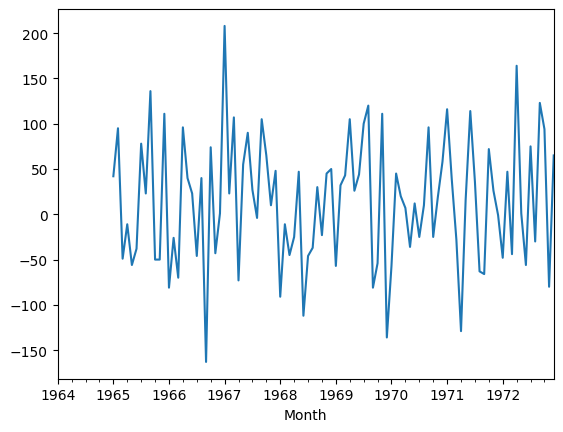

In [26]:
df['Seasonal First Difference'].plot()

AUTO REGRESSIVE MODEL

In [27]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [28]:
!pip3 install statsmodels



*   Identification of an AR model is often best done with PCAF(shuts off concept)
*   Identification of an MA model is often best done with ACF  rather than PACF(exponential decrease)


*   ARIMA includes Auto Regressive,Differencing and Moving Averages
*   ARIMA Model takes the value of p,d,q where p-AR model lags , d-differencing and q-MA lags





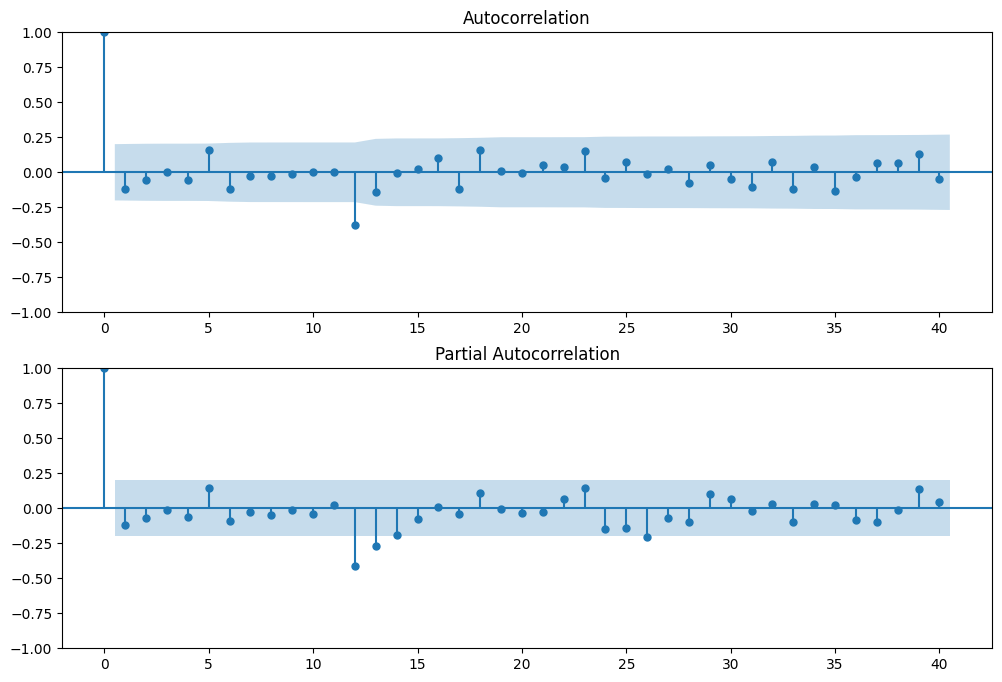

In [29]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

ARIMA IS SELECTED ONLY WHEN DATA IS NOT SEASONAL
SEASONAL DATA - SARIMAX (Seasonal ARIMAX)

###  Model Building with SARIMA

In [30]:
#p=1,d=1(one shift of seasonal differnce),q=0 or 1
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

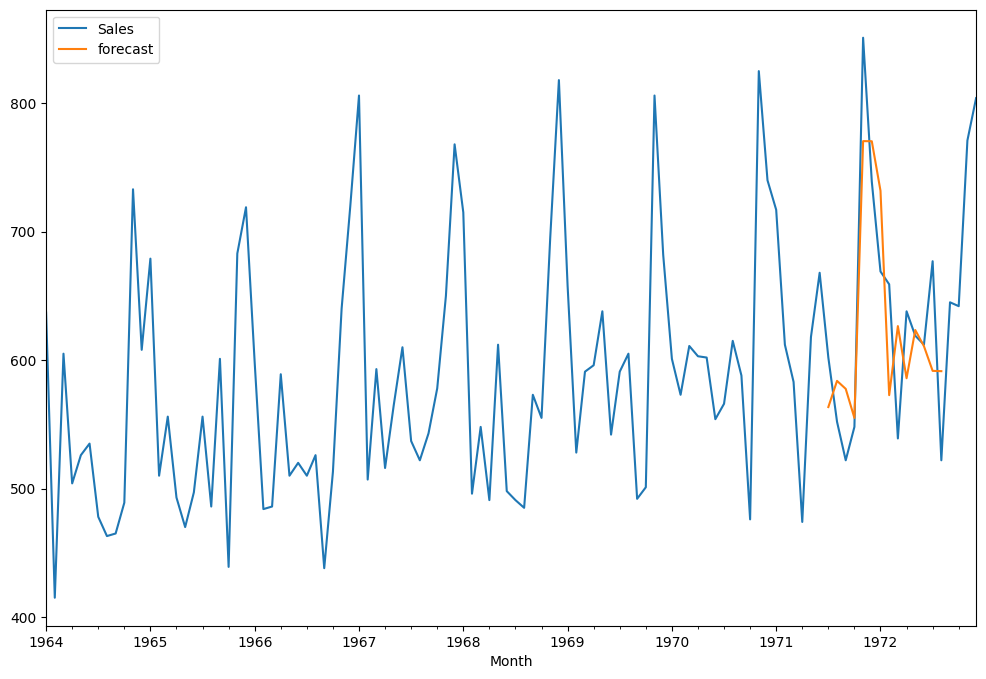

In [31]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

FUTURE FORECASTING

In [39]:
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start='1973-01-01', end='1975-12-01', freq='MS')

In [40]:
forecast = results.predict(start=future_dates[0], end=future_dates[-1])

In [41]:
future_df = pd.DataFrame({'Sales': None}, index=future_dates)
future_df['forecast'] = forecast

<Axes: title={'center': 'Garment Sales Forecast (1973–1975)'}>

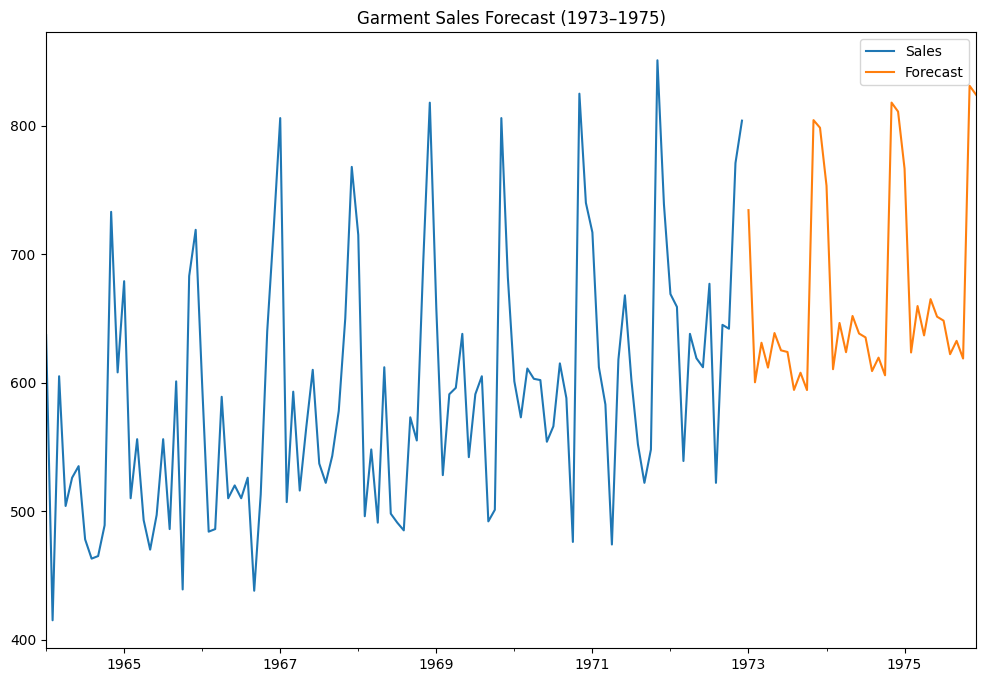

In [42]:
combined_df = pd.concat([df['Sales'], future_df['forecast']], axis=1)
combined_df.columns = ['Sales', 'Forecast']
combined_df.plot(figsize=(12, 8), title='Garment Sales Forecast (1973–1975)')



OBSERVATION:


1.   Seasonality is Preserved
2.   Overall Trend is stable in the upcoming year




###  Conclusion
This project successfully used SARIMA modeling to forecast future sales using simulated textile data. It showcases the practical use of time series forecasting for inventory optimization in the garment industry.
